In [36]:
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import sympy as sym
from sympy import symbols
from anastruct import SystemElements

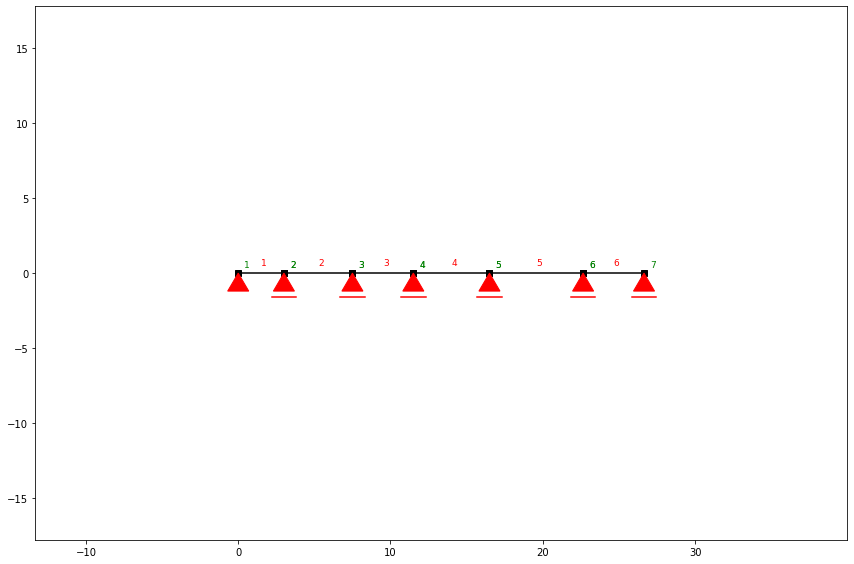

In [42]:
ses = SystemElements()
ses.add_element_grid([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65], [0, 0, 0, 0, 0, 0, 0])
ses.add_support_hinged(node_id=1)
ses.add_support_roll(node_id=[2,3,4,5,6, 7])
ses.show_structure(annotations=True)

In [2]:
%store -r Mmax
%store -r Mmin 
%store -r MEd_slu
MEd_slu 

,MEd+ [kN m],smax [m],MEd- [kN m],smin [m]
Section,,,,
C1,95.1842,1.25,NaN,NaN
N2,NaN,NaN,-196.506,3
C2,156.563,5.31,0,NaN
N3,NaN,NaN,-215.976,7.5
C3,124.347,9.55,-39.6907,9.47
N4,NaN,NaN,-209.989,11.5
C4,151.829,13.95,-6.19069,13.74
N5,NaN,NaN,-234.169,16.5
C5,144.51,19.55,0,NaN


In [4]:
smax = MEd_slu[['smax [m]']].to_numpy()
smin = MEd_slu[['smin [m]']].to_numpy()

smaxmin = np.sort((np.concatenate((smax, smin))).reshape(-1))
smaxmin = np.insert(smaxmin, -1, 26.65)

#ss is for plot
ss=smaxmin
for i in range (0, len(ss)-1):
    if ss[i+1] - ss[i] < 0.5:
        ss[i] = ss[i+1]
        
ss

array([1.25, nan, 3.0, 5.31, 7.5, 9.55, 9.55, 11.5, 13.95, 13.95, 16.5,
       19.55, 22.65, 25.0, nan, nan, nan, nan, nan, nan, nan, 26.65, nan],
      dtype=object)

In [5]:
MR1t = 50* np.ones(1000)

In [33]:
s = np.linspace(0,26.65, num=1000)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = s,
    y = Mmax,
    name='M+',
    line_color='#000000',
    showlegend=False,
    line = dict(width=1)
))

fig.add_trace(go.Scatter(
    x = s,
    y = Mmin,
    name='M-',
    line_color='#000000',
    fill='tonexty',
    showlegend=False,
    line = dict(width=1)
))

# fig.add_trace(go.Scatter(
#     x = s, 
#     y = MR1t,
#     name='2ϕ18',
#     showlegend=True,
#     line_color='#90ee90'
# ))

# fig.add_trace(go.Scatter(
#     x = s,
#     y = -MR1t,
#     name = '2ϕ18',
#     #sholegend = True,
#     line_color = '#90ee90'
# ))

fig.update_yaxes(autorange="reversed")
fig.update_traces(mode='lines')
fig.update_layout(
    title_text=('Inviluppo dei momenti flettenti<br>' + 'Combinazione SLU'),
    title_x=.5,
    autosize=True,
    xaxis = dict(
        tickmode='array',
        tickvals=ss,
        ticktext=ss,
        title=r'$s\,[m]$',
    ),
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 50,
        title=r'$M_{Ed}\,[kN\,m]$'
    ),
    xaxis_showgrid=True, 
    yaxis_showgrid=True,
)

fig.update_yaxes(automargin=True)
fig.show()

---

## Progetto sezione N5

Si ipotizzi di essere sulla retta limite tra il campo 2 e il campo 3. In questo modo:
$$
\xi_{2/3} = \dfrac{\varepsilon_{cu}}{\varepsilon_{cu} + \varepsilon_{su}}
$$

Assumendo 
\begin{align*}
\varepsilon_{cu} &= 0.35\%\\
\varepsilon_{su} &= 1.0\%
\end{align*}
risulta
$$
\xi_{2/3} = 0.2593
$$

Essendo sulla retta limite tra i campi 2 e 3, i valori di $\psi$ e $\lambda$ sono costanti e valgono
\begin{align*}
\psi &= 0.80952\\
\lambda &= 0.416
\end{align*}

In [249]:
b, psi, xi, d, fcd, beta, As, fyd, d2, MEd, mylambda, x, A1s = symbols('b psi xi d fcd beta As fyd d2 MEd mylambda x A1s')
type(d)

sympy.core.symbol.Symbol

In [255]:
MEd_N5 = 234.169 #kN m

In [65]:
eq = b*psi*xi*d**2 * fcd* (1-mylambda) + beta* (b*psi*xi*d*fcd / (1-beta)) * (d-d2) - MEd
type(eq)

sympy.core.add.Add

In [71]:
num_eq = eq.subs({b:300, psi:0.80952, xi:0.2593, fcd:14.17, beta:0.3, mylambda:0.416, fyd:391.3, d2:40, MEd:234.169*10**6})

In [81]:
d_sol=sym.solve(num_eq, d)
d_sol[1]

517.621512774738

In [123]:
sol_As = b*psi*xi*d*fcd / (fyd*(1-beta))
sol_As

b*d*fcd*psi*xi/(fyd*(1 - beta))

In [124]:
num_As = sol_As.subs({b:300, psi:0.80952, xi:0.2593, fcd:14.17, beta:0.3, fyd:391.3, d:d_sol[1]})
num_As

1686.26425634593

In [125]:
num_A1s = .3 * num_As
num_A1s

505.879276903778

Adottando
\begin{align}
d &= 560\,mm\\
\end{align}
si ottiene

In [114]:
d_sol1=560

In [126]:
num1_As = sol_As.subs({b:300, psi:0.80952, xi:0.2593, fcd:14.17, beta:0.3, fyd:391.3, d:d_sol1})
num1_As

1824.32136271096

In [127]:
num1_A1s = .3 * num1_As
num1_A1s

547.296408813289

Si sceglie allora
\begin{align}
A_s &= 6\Phi\,20mm = 1884.956\,mm^2\\
A'_s &= 2\Phi\,20mm = 628.319\,m^2
\end{align}

In [90]:
As_sol1 = np.pi*6*20**2 /4 #mm**2
A1s_sol1 = np.pi*2*20**2 /4 #mm**2

## Verifica sezione N5
Se ipotizziamo di essere in campo 3, $\psi$ e $\lambda$ sono costanti. Il copriferro superiore al limite elastico tra i campi 2 e 3 vale
$$
d''_{\varepsilon'_{2/3}} = \dfrac{\varepsilon_{cu} - \varepsilon'_{se}}{\varepsilon_{cu}}\,x_{2/3} = \dfrac{0.35-0.1863}{0.35}\%\,\cdot0.2593 \cdot 560\,mm = 67.916\,mm 
$$

Poiché $d'' = 40\,mm < d''_{\varepsilon'_{2/3}} = 67.916\,mm$ le armature superiori snervano in campo 2, sottocampo 2b).

Allora
$$
b\,\psi\,x\,fcd + A'_s\,f'_{yd} - A_s\,f_{yd} = 0
$$

da cui si ricava $x$

In [142]:
eq2 = b*psi*x*fcd+A1s*fyd-As*fyd
sol_eq2 = eq2.subs({b:300, psi:0.80952, fcd:14.17, A1s:A1s_sol1, As:As_sol1, fyd:391.3})
x2 = sym.solve(sol_eq2, x)
sol_eq2, x2
x2 = x2[0]
xi2 = x2/d_sol1
xi2 < 0.2593

True

L'ipotesi di campo 3 è **errata**!

Si ipotizza di essere in campo 2. Allora $\{\psi, \lambda\} \neq cost$.

**HP: sottocampo 2b ($\sigma'_s = f_{yd}$)**

Se $\varepsilon_c \in [\varepsilon_{c2}, \varepsilon_{cu}]$ allora
$$
\psi = 1 - \dfrac{1}{3}\,\dfrac{\varepsilon_{c2}}{\varepsilon_{c}} = 1 - \dfrac{1}{3}\,\dfrac{\varepsilon_{c2}}{\varepsilon_{su}}\,\dfrac{1-\xi}{\xi} = 1 - \dfrac{1}{3}\,\dfrac{2}{10}\cdot\dfrac{1-\xi}{\xi} = \frac{16 \xi - 1}{15 \xi}
$$

In [163]:
sym.simplify(1-(1/3) * (2/10) * (1-xi)/xi, rational=True)

(16*xi - 1)/(15*xi)

Essendo per ipotesi in campo 2b, le equazioni di equilibrio risultano
\begin{align}
b\,\psi\,\dfrac{x}{d}\,d\,f_{cd} + A'_s\,f_{yd} - A_s\,f_{yd} &= 0
\end{align}
cioè
$$
b\,\psi\,\xi\,d\,f_{cd} = f_{yd}\,(A_s - A'_s)
$$
ovvero
$$ 
\psi\,\xi = \dfrac{f_{yd}\,(A_s - A'_s)}{b\,d\,f_{cd}}
$$
Sostituendo la relazione di $\psi$ trovata sopra
$$
\frac{16 \xi - 1}{15 \xi}\,\xi = \dfrac{f_{yd}\,(A_s - A'_s)}{b\,d\,f_{cd}}
$$

In [192]:
eq3 = (16*xi-1)/(15*xi)*xi - (fyd*(As-A1s))/(b*d*fcd)
eq3

16*xi/15 - 1/15 - fyd*(-A1s + As)/(b*d*fcd)

In [193]:
sym.solve(eq3, xi)[0]

(-15*A1s*fyd + 15*As*fyd + b*d*fcd)/(16*b*d*fcd)

In [222]:
num_eq3 = eq3.subs({fyd:391.3, As:As_sol1, A1s:A1s_sol1, b:300, d:d_sol1, fcd:14.17})
xi3 = sym.solve(num_eq3, xi)[0]
xi3

0.256147482947766

Risolvendo si ottiene
$$\xi = 0.256147482947766$$

Il limite di $\xi$ per il campo elastico delle armature superiori è 
$$
\xi_{\varepsilon'_{se_{2a/2b}}} = \dfrac{1}{d}\left[\dfrac{\varepsilon'_{se}}{\varepsilon'_{se} + \varepsilon_{su}}\,(d-d'') + d''\right] = \dfrac{1}{560}\left[\dfrac{1.863}{1.863 + 10}\,(560-40) + 40\right] = 0.217254127479197
$$

In [206]:
sym.simplify((1.863/(1.863+10)) * (d-d2) + d2, rational=True)

78521453258029*d/500000000000000 + 421478546741971*d2/500000000000000

In [223]:
xi3lim_2a2b = ((1.863/(1.863+10)) * (d-d2) + d2).subs({d:d_sol1, d2:40})/d_sol1

In [224]:
xi3 < xi3lim_2a2b

False

In [227]:
(10/1000)/(d_sol1 - xi3*d_sol1) * (xi3*d_sol1 - 40) > 1.863/1000 

#epsilon'_s > epsilon'_se => OK CAMPO 2B

True

In [235]:
(10/1000) * (xi3*d_sol1)/(d_sol1*(1-xi3)) > 2/1000

#epsilon_c > epsilon_c2 => OK psi calcolato sopra!!!

True

In [233]:
psi3 = sym.simplify(1-(1/3) * (2/10) * (1-xi)/xi, rational=True).subs({xi:xi3})
psi3

0.806399941030868

Sono verificate le ipotesi di $\varepsilon_c  = 0.344\% \in [\varepsilon_{c2}, \varepsilon_{cu}] = [0.2, 0.35]\%$ e di campo 2b con le armature superiori snervate, essendo $\varepsilon'_{s} = 0.248\% > 0.1863\% = \varepsilon'_{se}$.

Allora, i valori di $\psi$ e $\lambda$ sono
\begin{align}
\psi &= 0.806399941030868\\
\lambda &= 0.41481981971363
\end{align}

In [239]:
mylambda3 = (6*((10/1000) * (xi3*d_sol1)/(d_sol1*(1-xi3)))**2 - 4*((10/1000) * (xi3*d_sol1)/(d_sol1*(1-xi3))) * 2/1000 + (2/1000)**2)/(4*((10/1000) * (xi3*d_sol1)/(d_sol1*(1-xi3)))*(3*((10/1000) * (xi3*d_sol1)/(d_sol1*(1-xi3)))-(2/1000)))
mylambda3

0.414819819713630

In [247]:
MRd = b*psi*xi*d*fcd*(d-mylambda*xi*d) + A1s*fyd*(d-d2)
MRd = MRd.subs({b:300, psi:psi3, xi:xi3, mylambda:mylambda3, d:d_sol1, fcd:14.17, A1s:A1s_sol1, fyd:391.3, d2:40})/10**6
print(MRd, 'kN m')

373.953252134809 kN m


In [256]:
MRd > MEd_N5

True

### La sezione è verificata!

In [257]:
bmin = 6*20+2*10+5*25+2*20
bmin

305

In [258]:
bmin > 300

True

È necessario mettere le armature tese su due file!